* 성명 : 유영서

* https://dacon.io/competitions/official/235647/data
* 데이터 다운받지 않으신 분이 계시다면 다운받는 법은 위 링크에서 받거나
* !git clone https://github.com/DataScience-Lab-Yonsei/8th_EDA
* 실행하면 모든 자료가 다 받아집니다.

# 전처리

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [6]:
# 첫째 column 삭제
data.drop(["index"], axis=1, inplace=True)

In [7]:
data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QbA         45532 non-null  float64
 1   QbE         45532 non-null  int64  
 2   QcA         45532 non-null  float64
 3   QcE         45532 non-null  int64  
 4   QeA         45532 non-null  float64
 5   QeE         45532 non-null  int64  
 6   QfA         45532 non-null  float64
 7   QfE         45532 non-null  int64  
 8   QhA         45532 non-null  float64
 9   QhE         45532 non-null  int64  
 10  QjA         45532 non-null  float64
 11  QjE         45532 non-null  int64  
 12  QkA         45532 non-null  float64
 13  QkE         45532 non-null  int64  
 14  QmA         45532 non-null  float64
 15  QmE         45532 non-null  int64  
 16  QoA         45532 non-null  float64
 17  QoE         45532 non-null  int64  
 18  QqA         45532 non-null  float64
 19  QqE         45532 non-nul

In [9]:
# 질문의 내용을 모르는 열은 사용하는 의미가 없을 것 같아요.
# Qa, Qd, Qg, Qi, Ql, Qn, Qp, Qt 열은 제거해주세요
data.drop(["QaA", "QaE", "QdA", "QdE", "QgA", "QgE", "QiA", "QiE", "QlA", "QlE", "QnA", "QnE", "QpA", "QpE", "QtA", "QtE"], axis=1, inplace=True)

# 간단한 분석

* pandas의 pivottable 기능을 이용해서 각자 자료를 3개씩 분석해 주세요

* 예시 
* 분석한 내용
> * tp09열은 Calm, emotionally stable을 나타내는데 내 생각에 남성이 여성보다 더 stable 할 것 같다
> * 따라서 성별로 tp09에 어떻게 답하였는지 사이즈를 살펴보았다. (0에 가까울 수록 강력하게 동의)

In [10]:
pivot = pd.pivot_table(data = data, index = "tp09", columns = "gender", aggfunc = "size", fill_value = 0)

In [11]:
pivot
# 결과를 보니 강력하게 동의하는 0~1에 남성들이 많았다.

gender,Female,Male
tp09,,
0,2714,6085
1,4612,6147
2,4006,3863
3,2464,2580
4,3587,2741
5,2301,1625
6,1495,1026
7,136,150


* 이 이후에는 0,1로 강력하게 답한 사람, 중간으로 답한 사람, 6,7로 약하게 답한 사람별로 나눠서 추가적으로 분석해 볼 수도 있겠네요
* 이런 식으로 꼬리를 물어가면서 분석하면 조금 더 다양한 결과가 나올 것 같아요.

## 첫번째 분석

* 분석한 내용 간단히 설명 : 유년기를 농촌에서 보낸 사람들이 사람의 본성을 우호적으로 볼 것으로 추정하여 유년기 거주 지역에 따라 사람들의 본성이 좋다고 평가하는 비율을 확인해봄. QqA가 1인 경우 Disagree, 5인 경우 Agree

In [12]:
pivot = pd.pivot_table(data = data, index = "urban", columns = "QqA", aggfunc = "size", fill_value = 0)

In [13]:
pivot

QqA,1.0,2.0,3.0,4.0,5.0
urban,,,,,
0,92,59,53,69,49
1,2063,1760,1493,2142,1451
2,4222,3791,3314,4426,2781
3,4654,3612,3193,3795,2513


## 두번째 분석

* 분석한 내용 간단히 설명 : '다른 사람에게 거짓말을 하는 것에는 변명의 여지가 없다'라는 것을 주제로 남녀간의 의식 차이를 비교해봄. QfA가 1인 경우 Disagree, 5인 경우 Agree

In [14]:
pivot = pd.pivot_table(data = data, index = "gender", columns = "QfA", aggfunc = "size", fill_value = 0)

In [15]:
pivot

QfA,1.0,2.0,3.0,4.0,5.0
gender,,,,,
Female,7232,6656,1879,2904,2644
Male,12345,6138,1784,2020,1930


## 세번째 분석

* 분석한 내용 간단히 설명 : 연령대 별 투표율을 확인

In [16]:
pivot = pd.pivot_table(data = data, index = "age_group", columns = "voted", aggfunc = "size", fill_value = 0)
pivot = pivot.drop('10s', axis=0)


In [17]:
pivot

voted,1,2
age_group,,
+70s,173,62
20s,7484,6628
30s,4614,3222
40s,3243,1808
50s,1936,953
60s,870,324


* 10대의 경우, 선거권을 갖지 못하는 나이대가 포함되므로 제외함
* 연령대가 높아질수록 투표율이 높아짐을 확인할 수 있음

## 인종에 따른 데이터 분석

### 인종에 따른 투표율 양상
인종에 따른 투표율의 양상을 확인해보았습니다.

In [18]:
pivot = pd.pivot_table(data = data, index = "race", columns = "voted", aggfunc = "size", fill_value = 0)
pivot

voted,1,2
race,,
Arab,102,249
Asian,2019,4815
Black,872,1296
Indigenous Australian,24,29
Native American,226,322
Other,1635,2695
White,15756,15492


* 백인의 투표율이 타 인종의 투표율보다 높게 나타났습니다.
* 이에 따라 정치인들은 백인을 위한 정책을 제시할 가능성이 더 높을 것으로 추정됩니다.

### 인종에 따른 종교 분포
인종에 따른 종교 분포를 알아보았습니다.

In [24]:
pivot = pd.pivot_table(data = data, index = "race", columns = "religion", aggfunc = "size", fill_value = 0)
pivot

religion,Agnostic,Atheist,Buddhist,Christian_Catholic,Christian_Mormon,Christian_Other,Christian_Protestant,Hindu,Jewish,Muslim,Other,Sikh
race,,,,,,,,,,,,
Arab,59,53,3,17,2,14,9,3,4,165,21,1
Asian,1045,1072,446,952,15,297,388,1177,10,706,633,93
Black,362,230,21,213,8,633,305,10,1,81,304,0
Indigenous Australian,12,12,1,6,0,7,1,1,0,2,10,1
Native American,101,79,9,77,11,102,59,2,3,1,103,1
Other,903,757,50,774,33,513,241,217,40,142,644,16
White,7142,7989,320,4392,359,3571,3872,19,429,95,3055,5


* Asian에게서 Buddihist, Hindu, 그리고 Muslim을 믿는 비율이 높았습니다.

### 인종에 따른 교육수준
인종에 따른 교육 수준을 알아보았습니다.

In [26]:
pivot = pd.pivot_table(data = data, index = "race", columns = "education", aggfunc = "size", fill_value = 0)
pivot

education,0,1,2,3,4
race,,,,,
Arab,3,55,112,119,62
Asian,70,694,2032,2414,1624
Black,21,285,921,659,282
Indigenous Australian,1,4,20,19,9
Native American,7,88,249,140,64
Other,54,582,1853,1232,609
White,372,3380,11648,10644,5204


* Asian, Black, 그리고 White 중에서, Asian의 교육수준이 가장 높았으며, Black의 교육수준이 가장 낮았습니다.

## 종교에 따른 데이터 분석

### 종교에 따른 거짓말을 용인하는 정도
종교에 따라 어느 정도로 거짓말을 용인하는지를 확인해보았습니다.

In [27]:
pivot = pd.pivot_table(data = data, index = "religion", columns = "QfA", aggfunc = "size", fill_value = 0)
pivot

QfA,1.0,2.0,3.0,4.0,5.0
religion,,,,,
Agnostic,4790,2730,679,876,549
Atheist,5638,2623,613,813,505
Buddhist,285,250,100,105,110
Christian_Catholic,2321,1959,603,768,780
Christian_Mormon,128,131,30,79,60
Christian_Other,1613,1466,474,704,880
Christian_Protestant,1745,1449,356,681,644
Hindu,446,377,183,141,282
Jewish,235,127,34,54,37


* Christian, Buddhist, 그리고 Muslim은 다른 종교에 비해 거짓말에는 변명의 여지가 없다고 생각하는 비율이 높았습니다

### 종교에 따른 이혼율
종교에 따른 이혼율을 비교해보았습니다.

In [29]:
pivot = pd.pivot_table(data = data, index = "religion", columns = "married", aggfunc = "size", fill_value = 0)
pivot

married,0,1,2,3
religion,,,,
Agnostic,14,7167,1748,695
Atheist,23,7865,1700,604
Buddhist,0,575,179,96
Christian_Catholic,19,4412,1509,491
Christian_Mormon,0,250,144,34
Christian_Other,9,3070,1418,640
Christian_Protestant,7,2555,1787,526
Hindu,9,1117,273,30
Jewish,2,318,129,38


* Hindu의 경우, 이혼율이 낮게 나왔습니다.

### 종교에 따른 투표율
종교에 따른 투표율을 비교해보았습니다.

In [30]:
pivot = pd.pivot_table(data = data, index = "religion", columns = "voted", aggfunc = "size", fill_value = 0)
pivot

voted,1,2
religion,,
Agnostic,4402,5222
Atheist,4355,5837
Buddhist,322,528
Christian_Catholic,3045,3386
Christian_Mormon,163,265
Christian_Other,2365,2772
Christian_Protestant,2756,2119
Hindu,553,876
Jewish,268,219


* Muslim의 경우, 투표율이 낮게 나왔습니다.

## 대한민국 종교 인구 비율
위 자료는 대한민국의 자료는 아닌 것으로 추정된다.  
우선, 대한민국 인구의 종교 분포 비율을 알아보자

In [24]:
# import libraries
import requests
import urllib
from bs4 import BeautifulSoup
from IPython.display import Image


In [25]:
#User-Agent 지정
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

In [26]:
# target url에 대한 soup 객체 생성
hrcopinion = requests.get("https://hrcopinion.co.kr/archives/20186", headers=headers)
hrcopinion.status_code
hrcopinion.raise_for_status()
soup = BeautifulSoup(hrcopinion.text, 'lxml')

In [27]:
# image url 추출
img_a = soup.find('img', attrs={'class': 'lazyload img-responsive wp-image-20162'})
img_url = img_a['src']
img_url

'https://i0.wp.com/hrcopinion.co.kr/wp-content/uploads/2021/12/hrcopinion_theme_211208_11.png?fit=704%2C491&ssl=1'

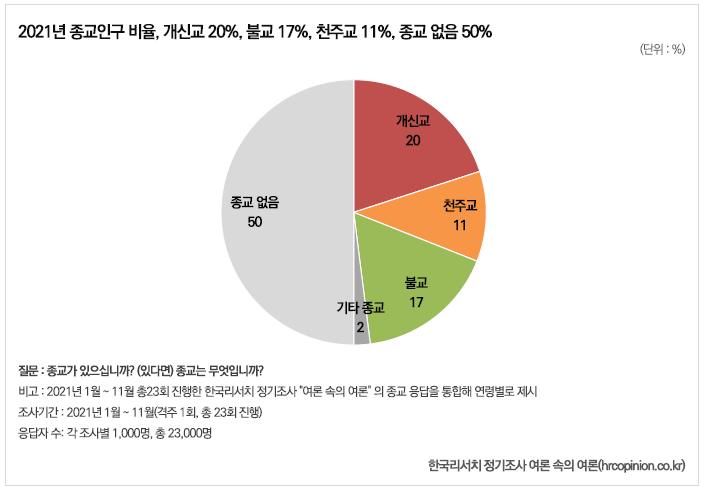

In [30]:
# image 다운로드 후 show
urllib.request.urlretrieve(img_url, 'religion.jpg')
Image(filename='religion.jpg')

* 2021년 대한민국의 경우, 무교가 50%, 개신교가 20%, 불교가 17%, 천주교가 11% 순으로 집계되었다.
* 종교에 관련된 국내 심리 자료가 있다면, 이를 분석해 보는 것이 외국 자료를 분석하는것 보다 와닿을 듯 하다.